In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Rense data (gjort for oss av Ingeborg)

In [11]:
data_frame = pd.read_csv("lego.population.csv", sep =",", encoding ="latin1")
# fjerner forklaringsvariabler vi ikke trenger
lego_set_data = data_frame[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
lego_set_data = lego_set_data.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
lego_set_data['Theme'] = lego_set_data['Theme'].astype(str)
lego_set_data['Theme'] = lego_set_data['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
lego_set_data['Price'] = lego_set_data['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
lego_set_data['Price'] = lego_set_data['Price'].astype(float)

lego_set_data

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


### A. Unike brikker beskrevet av (totalt) antall brikker (Enkel lineær regresjon)

In [12]:
# enkel lineær regresjon
formel = 'Unique_Pieces ~ Pieces'

model = smf.ols(formel, data = lego_set_data)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2180.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          6.72e-219
Time:                        10:22:48   Log-Likelihood:                -3894.2
No. Observations:                 714   AIC:                             7792.
Df Residuals:                     712   BIC:                             7802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7744      2.632     27.267      0.000      66.607      76.942
Pieces         0.1763      0.004     46.692      0.000       0.169       0.184
==============================================================================
Omnibus:                      276.678   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9691.463
Skew:                          -1.054   Prob(JB):                         0.00
Kurtosis:                      20.925   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

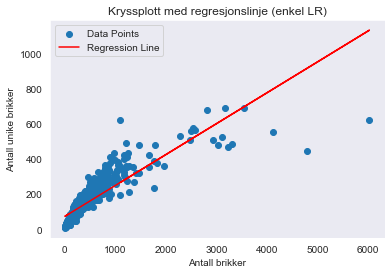

In [13]:
slope = result.params['Pieces']
intercept = result.params['Intercept']

regression_x = np.array(lego_set_data['Pieces'])
regression_y = slope * regression_x + intercept

plt.scatter(lego_set_data['Pieces'], lego_set_data['Unique_Pieces'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

### B. Unike brikker beskrevet av antall brikker og pris (Multippel lineær regresjon)

In [14]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Unique_Pieces ~ Pieces + Price' , data = lego_set_data)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1100.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.16e-218
Time:                        10:22:48   Log-Likelihood:                -3891.3
No. Observations:                 714   AIC:                             7789.
Df Residuals:                     711   BIC:                             7802.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.3146      2.814     24.630      0.000      63.789      74.840
Pieces         0.1553      0.009     16.390      0.000       0.137       0.174
Price          0.2404      0.100      2.414      0.016       0.045       0.436
==============================================================================
Omnibus:                      323.734   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12286.252
Skew:                          -1.337   Prob(JB):                         0.00
Kurtosis:                      23.145   Cond. No.                         933.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### C. Unike brikker beskrevet av antall brikker, med egne parametere for hver gruppe (Film/TV-serier, spill, ingen av delene)
### a. Egen modell for hver gruppe (3x Enkel lineær regresjon)

In [15]:
# Groups the themes together and creates corresponding arrays
film_tv_themes = ['NINJAGO', 'Star Wars', 'Batman', 'DC', 'Disney', 'Jurassic World', 'LEGO Frozen 2', 'Marvel', 'Minions', 'Monkie Kid', 'Powerpuff Girls', 'Spider-Man', 'Stranger Things', 'THE LEGO MOVIE 2', 'Trolls World Tour', 'Unikitty', 'Harry Potter']

video_games_themes = ['Hidden Side', 'Minecraft', 'Overwatch']

other_themes = ['City', 'Friends', 'Classic', 'Creator 3-in-1', 'Creator Expert', 'DUPLO', 'Ideas', 'Juniors', 'Minifigures', 'Powered UP', 'Speed Champions']

film_tv = lego_set_data[lego_set_data['Theme'].isin(film_tv_themes)]
video_games = lego_set_data[lego_set_data['Theme'].isin(video_games_themes)]
other = lego_set_data[lego_set_data['Theme'].isin(other_themes)]


In [16]:
# Puts the previously grouped themes in an array of the categories film/tv, video games and other
lego_set_data['category'] = np.where(lego_set_data['Theme'].isin(film_tv_themes), 'Film/Tv',
                                np.where(lego_set_data['Theme'].isin(video_games_themes), 'VideoGames', 'Other'))
lego_set_data.groupby(['category']).size().reset_index(name ='Count')

,category,Count
0,Film/Tv,371
1,Other,296
2,VideoGames,47


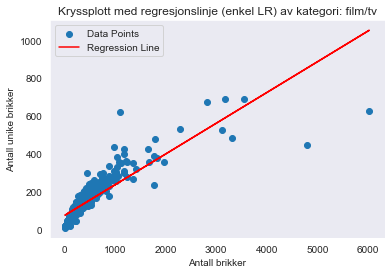

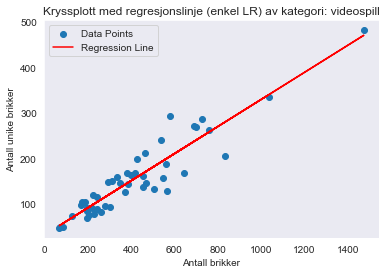

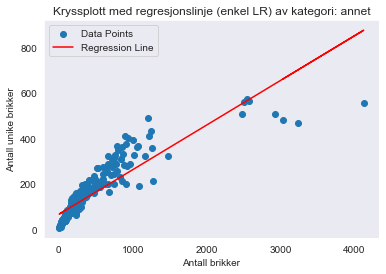

In [17]:


for media in [film_tv, video_games, other]:
    kategori = ""
    if media['Theme'].count() == film_tv['Theme'].count():
        kategori = "film/tv"
    elif media['Theme'].count() == video_games['Theme'].count():
        kategori = "videospill"
    elif media['Theme'].count() == other['Theme'].count():
        kategori = "annet"

    model = smf.ols('Unique_Pieces ~ Pieces', data = media)
    result = model.fit()

    slope = result.params['Pieces']
    intercept = result.params['Intercept']

    regression_x = np.array(media['Pieces'])
    regression_y = slope * regression_x + intercept

    plt.scatter(media['Pieces'], media['Unique_Pieces'], label='Data Points')
    plt.plot(regression_x, regression_y, color='red', label='Regression Line')
    plt.xlabel('Antall brikker')
    plt.ylabel('Antall unike brikker')
    plt.title(f"Kryssplott med regresjonslinje (enkel LR) av kategori: {kategori}")
    plt.legend()
    plt.grid()
    plt.show()

### b. Kun eget skjæringspunkt (Multippel lineær regresjon)

# grupperer temaene

In [18]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + category' , data = lego_set_data)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1273.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          4.18e-285
Time:                        10:22:49   Log-Likelihood:                -3192.1
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     710   BIC:                             6410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.9081      1.268      7.812      0.000       7.418      12.398
category[T.Other]          1.5350      1.656      0.927      0.354      -1.716       4.786
category[T.VideoGames]    -5.1903      3.284     -1.580      0.114     -11.639       1.258
Pieces                     0.0874      0.001     61.707      0.000       0.085       0.090
==============================================================================
Omnibus:                      656.958   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62087.173
Skew:                           3.686   Prob(JB):                         0.00
Kurtosis:                      48.085   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### c. Eget skjæringspunkt og stigningstall (Multippel lineær regresjon med interaksjon)